In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('2023_population.csv')
df.head()

,iso_code,country,2023_last_updated,2022_population,area_sq_km,land_area_sq_km,density_/sq_km,growth_rate,world_%,rank
0,IND,India,"1,428,465,583","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,CHN,China,"1,425,675,729","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,USA,United States,"339,974,056","338,289,857",9.4M,9.1M,37,0.5%,4.25%,3
3,IDN,Indonesia,"277,505,959","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,PAK,Pakistan,"240,427,745","235,824,862",881.9K,770.9K,312,1.98%,3%,5


In [169]:
df.shape

(228, 10)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           228 non-null    object
 1   country            228 non-null    object
 2   2023_last_updated  228 non-null    object
 3   2022_population    228 non-null    object
 4   area_sq_km         228 non-null    object
 5   land_area_sq_km    228 non-null    object
 6   density_/sq_km     228 non-null    object
 7   growth_rate        228 non-null    object
 8   world_%            228 non-null    object
 9   rank               228 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 17.9+ KB


In [171]:
df.nunique()

iso_code             227
country              228
2023_last_updated    228
2022_population      228
area_sq_km           213
land_area_sq_km      209
density_/sq_km       163
growth_rate          172
world_%               79
rank                 228
dtype: int64

In [172]:
df.isnull().sum()

iso_code             0
country              0
2023_last_updated    0
2022_population      0
area_sq_km           0
land_area_sq_km      0
density_/sq_km       0
growth_rate          0
world_%              0
rank                 0
dtype: int64

In [108]:
#converting object variable to int
#df['2023_last_updated']= pd.to_numeric(df['2023_last_updated'],errors='ignore')
#df['2022_population']= pd.to_numeric(df['2022_population'],errors='coerce')
#df['area_sq_km']= pd.to_numeric(df['area_sq_km'],errors='coerce')
#df['land_area_sq_km']= pd.to_numeric(df['land_area_sq_km'],errors='coerce')
#df['density_/sq_km']= pd.to_numeric(df['density_/sq_km'],errors='coerce')
#df['growth_rate']= pd.to_numeric(df['growth_rate'],errors='coerce')
#df['world_%']= pd.to_numeric(df['world_%'],errors='coerce')

### Before converting to float/int, remove all symbols

In [173]:
df['2023_last_updated'] = df['2023_last_updated'].str.replace(',','')
df['2023_last_updated']=pd.to_numeric(df['2023_last_updated'])
df['2023_last_updated'].dtype

dtype('int64')

In [174]:
df.head()

,iso_code,country,2023_last_updated,2022_population,area_sq_km,land_area_sq_km,density_/sq_km,growth_rate,world_%,rank
0,IND,India,1428465583,"1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,CHN,China,1425675729,"1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,USA,United States,339974056,"338,289,857",9.4M,9.1M,37,0.5%,4.25%,3
3,IDN,Indonesia,277505959,"275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,PAK,Pakistan,240427745,"235,824,862",881.9K,770.9K,312,1.98%,3%,5


In [175]:
df['2022_population'] = df['2022_population'].str.replace(',','')
df['2022_population']=pd.to_numeric(df['2022_population'])
df['2022_population'].dtype

dtype('int64')

In [176]:
import re

In [12]:
#df['area_sq_km'] = df['area_sq_km'].apply(lambda x: re.split('M|K',x))

In [177]:
df['area_sq_km_num'] = df['area_sq_km'].str.extract('([\d{1}\.]+)',expand =True)

In [178]:
df['area_sq_km_num']=pd.to_numeric(df['area_sq_km_num'])

In [179]:
df['area_sq_km_alph'] = df['area_sq_km'].str.extract('([M|K])',expand =True)

In [180]:
df['area_sq_km_alph'] =df['area_sq_km_alph'] .str.replace('M','1000000').str.replace('K','1000')

In [181]:
df['area_sq_km_alph'].fillna('1',inplace=True)

In [182]:
df['area_sq_km_alph'] =pd.to_numeric(df['area_sq_km_alph'] )

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso_code           228 non-null    object 
 1   country            228 non-null    object 
 2   2023_last_updated  228 non-null    int64  
 3   2022_population    228 non-null    int64  
 4   area_sq_km         228 non-null    object 
 5   land_area_sq_km    228 non-null    object 
 6   density_/sq_km     228 non-null    object 
 7   growth_rate        228 non-null    object 
 8   world_%            228 non-null    object 
 9   rank               228 non-null    int64  
 10  area_sq_km_num     228 non-null    float64
 11  area_sq_km_alph    228 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 21.5+ KB


In [184]:
df['area_sq_km_final'] =df['area_sq_km_alph'] *df['area_sq_km_num']
df

,iso_code,country,2023_last_updated,2022_population,area_sq_km,land_area_sq_km,density_/sq_km,growth_rate,world_%,rank,area_sq_km_num,area_sq_km_alph,area_sq_km_final
0,IND,India,1428465583,1417173173,3.3M,3M,481,0.81%,17.85%,1,3.3,1000000,3300000.0
1,CHN,China,1425675729,1425887337,9.7M,9.4M,151,-0.02%,17.81%,2,9.7,1000000,9700000.0
2,USA,United States,339974056,338289857,9.4M,9.1M,37,0.5%,4.25%,3,9.4,1000000,9400000.0
3,IDN,Indonesia,277505959,275501339,1.9M,1.9M,148,0.74%,3.47%,4,1.9,1000000,1900000.0
4,PAK,Pakistan,240427745,235824862,881.9K,770.9K,312,1.98%,3%,5,881.9,1000,881900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MSR,Montserrat,4386,4390,102,102,43,-0.09%,MSR,230,102.0,1,102.0
224,FLK,Falkland Islands,3791,3780,12.2K,12.2K,0.31,0.29%,FLK,231,12.2,1000,12200.0
225,NIU,Niue,1935,1934,261,261,7,0.05%,NIU,232,261.0,1,261.0
226,TKL,Tokelau,1893,1871,12,10,189,1.18%,TKL,233,12.0,1,12.0


In [185]:
df.drop(['area_sq_km','area_sq_km_num','area_sq_km_alph'],axis=1,inplace=True)

In [186]:
df['land_area_sq_km_num'] = df['land_area_sq_km'].str.extract('([\d{1}\.]+)',expand =True)

In [187]:
df['land_area_sq_km_num']=pd.to_numeric(df['land_area_sq_km_num'])

In [188]:
df['land_area_sq_km_alph'] = df['land_area_sq_km'].str.extract('([M|K])',expand =True)

In [189]:
df['land_area_sq_km_alph'] =df['land_area_sq_km_alph'] .str.replace('M','1000000').str.replace('K','1000')

In [190]:
df['land_area_sq_km_alph'].fillna('1',inplace=True)

In [191]:
df['land_area_sq_km_alph'] =pd.to_numeric(df['land_area_sq_km_alph'] )

In [192]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   iso_code              228 non-null    object 
 1   country               228 non-null    object 
 2   2023_last_updated     228 non-null    int64  
 3   2022_population       228 non-null    int64  
 4   land_area_sq_km       228 non-null    object 
 5   density_/sq_km        228 non-null    object 
 6   growth_rate           228 non-null    object 
 7   world_%               228 non-null    object 
 8   rank                  228 non-null    int64  
 9   area_sq_km_final      228 non-null    float64
 10  land_area_sq_km_num   228 non-null    float64
 11  land_area_sq_km_alph  228 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 21.5+ KB


In [193]:
df['land_area_sq_km_final'] =df['land_area_sq_km_alph'] *df['land_area_sq_km_num']
df

,iso_code,country,2023_last_updated,2022_population,land_area_sq_km,density_/sq_km,growth_rate,world_%,rank,area_sq_km_final,land_area_sq_km_num,land_area_sq_km_alph,land_area_sq_km_final
0,IND,India,1428465583,1417173173,3M,481,0.81%,17.85%,1,3300000.0,3.0,1000000,3000000.0
1,CHN,China,1425675729,1425887337,9.4M,151,-0.02%,17.81%,2,9700000.0,9.4,1000000,9400000.0
2,USA,United States,339974056,338289857,9.1M,37,0.5%,4.25%,3,9400000.0,9.1,1000000,9100000.0
3,IDN,Indonesia,277505959,275501339,1.9M,148,0.74%,3.47%,4,1900000.0,1.9,1000000,1900000.0
4,PAK,Pakistan,240427745,235824862,770.9K,312,1.98%,3%,5,881900.0,770.9,1000,770900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MSR,Montserrat,4386,4390,102,43,-0.09%,MSR,230,102.0,102.0,1,102.0
224,FLK,Falkland Islands,3791,3780,12.2K,0.31,0.29%,FLK,231,12200.0,12.2,1000,12200.0
225,NIU,Niue,1935,1934,261,7,0.05%,NIU,232,261.0,261.0,1,261.0
226,TKL,Tokelau,1893,1871,10,189,1.18%,TKL,233,12.0,10.0,1,10.0


In [194]:
df.drop(['land_area_sq_km','land_area_sq_km_num','land_area_sq_km_alph'],axis=1,inplace=True)

In [195]:
df

,iso_code,country,2023_last_updated,2022_population,density_/sq_km,growth_rate,world_%,rank,area_sq_km_final,land_area_sq_km_final
0,IND,India,1428465583,1417173173,481,0.81%,17.85%,1,3300000.0,3000000.0
1,CHN,China,1425675729,1425887337,151,-0.02%,17.81%,2,9700000.0,9400000.0
2,USA,United States,339974056,338289857,37,0.5%,4.25%,3,9400000.0,9100000.0
3,IDN,Indonesia,277505959,275501339,148,0.74%,3.47%,4,1900000.0,1900000.0
4,PAK,Pakistan,240427745,235824862,312,1.98%,3%,5,881900.0,770900.0
...,...,...,...,...,...,...,...,...,...,...
223,MSR,Montserrat,4386,4390,43,-0.09%,MSR,230,102.0,102.0
224,FLK,Falkland Islands,3791,3780,0.31,0.29%,FLK,231,12200.0,12200.0
225,NIU,Niue,1935,1934,7,0.05%,NIU,232,261.0,261.0
226,TKL,Tokelau,1893,1871,189,1.18%,TKL,233,12.0,10.0


In [196]:
df['density_/sq_km'].unique() # we need to remove ',' before converting it into numeric

array(['481', '151', '37', '148', '312', '246', '26', '1,329', '9', '66',
       '112', '338', '394', '113', '45', '315', '55', '110', '238', '141',
       '280', '76', '118', '50', '199', '97', '84', '47', '531', '242',
       '95', '17', '19', '105', '65', '134', '4', '85', '63', '29', '80',
       '27', '104', '150', '43', '216', '52', '91', '33', '61', '21', '3',
       '217', '661', '126', '354', '222', '28', '86', '7', '15', '73',
       '169', '92', '523', '96', '58', '571', '122', '516', '11', '425',
       '386', '128', '235', '108', '18', '136', '23', '111', '424', '166',
       '109', '223', '7,135', '82', '59', '35', '62', '14', '307',
       '8,377', '56', '892', '20', '102', '5', '60', '72', '31', '54',
       '2', '368', '103', '261', '98', '274', '236', '77', '83', '299',
       '1,892', '641', '49', '391', '51', '458', '21,403', '254', '1,672',
       '1,737', '41', '325', '898', '89', '16', '656', '81', '433', '295',
       '320', '165', '371', '234', '590', '266', '2

In [197]:
df['density_/sq_km']=df['density_/sq_km'].str.replace(',','')
df['density_/sq_km'] =pd.to_numeric(df['density_/sq_km'])


In [198]:
df['world_%'].unique()

array(['17.85%', '17.81%', '4.25%', '3.47%', '3%', '2.8%', '2.7%',
       '2.16%', '1.8%', '1.6%', '1.58%', '1.54%', '1.47%', '1.41%',
       '1.28%', '1.23%', '1.11%', '1.07%', '1.04%', '0.9%', '0.85%',
       '0.84%', '0.81%', '0.75%', '0.74%', '0.69%', '0.68%', '0.65%',
       '0.61%', '0.6%', '0.59%', '0.57%', '0.53%', '0.51%', '0.48%',
       '0.47%', '0.46%', '0.44%', '0.43%', '0.42%', '0.39%', '0.38%',
       '0.36%', '0.34%', '0.33%', '0.3%', '0.29%', '0.27%', '0.26%',
       '0.25%', '0.24%', '0.23%', '0.22%', '0.21%', '0.18%', '0.17%',
       '0.16%', '0.15%', '0.14%', '0.13%', '0.12%', '0.11%', '0.1%',
       '0.09%', '0.08%', '0.07%', '0.06%', '0.05%', '0.04%', '0.03%',
       '0.02%', '0.01%', '0%', 'SPM', 'MSR', 'FLK', 'NIU', 'TKL', 'VAT'],
      dtype=object)

In [199]:
df['growth_rate']=df['growth_rate'].str.replace('%','')

In [200]:
df['growth_rate']= df['growth_rate'].apply(lambda x: float(x))

In [201]:
df['world_%'] = df['world_%'].str.replace('%','').str.replace('[A-Z|a-z]','')

C:\Users\sathe\AppData\Local\Temp\ipykernel_11040\2027368558.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['world_%'] = df['world_%'].str.replace('%','').str.replace('[A-Z|a-z]','')


In [202]:
df['world_%']=pd.to_numeric(df['world_%'],errors='coerce')

In [203]:
df['world_%'].fillna(method='pad',inplace=True)

In [204]:
df

,iso_code,country,2023_last_updated,2022_population,density_/sq_km,growth_rate,world_%,rank,area_sq_km_final,land_area_sq_km_final
0,IND,India,1428465583,1417173173,481.00,0.81,17.85,1,3300000.0,3000000.0
1,CHN,China,1425675729,1425887337,151.00,-0.02,17.81,2,9700000.0,9400000.0
2,USA,United States,339974056,338289857,37.00,0.50,4.25,3,9400000.0,9100000.0
3,IDN,Indonesia,277505959,275501339,148.00,0.74,3.47,4,1900000.0,1900000.0
4,PAK,Pakistan,240427745,235824862,312.00,1.98,3.00,5,881900.0,770900.0
...,...,...,...,...,...,...,...,...,...,...
223,MSR,Montserrat,4386,4390,43.00,-0.09,0.00,230,102.0,102.0
224,FLK,Falkland Islands,3791,3780,0.31,0.29,0.00,231,12200.0,12200.0
225,NIU,Niue,1935,1934,7.00,0.05,0.00,232,261.0,261.0
226,TKL,Tokelau,1893,1871,189.00,1.18,0.00,233,12.0,10.0


## 2. visualizong correlation between columns 

In [208]:
df.corr()

C:\Users\sathe\AppData\Local\Temp\ipykernel_11040\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,2023_last_updated,2022_population,density_/sq_km,growth_rate,world_%,rank,area_sq_km_final,land_area_sq_km_final
2023_last_updated,1.000000,0.999984,-0.026713,-0.016985,0.999999,-0.358802,0.451474,0.451998
2022_population,0.999984,1.000000,-0.026586,-0.019495,0.999982,-0.357537,0.452242,0.452779
density_/sq_km,-0.026713,-0.026586,1.000000,-0.073614,-0.026662,0.133097,-0.065396,-0.065393
growth_rate,-0.016985,-0.019495,-0.073614,1.000000,-0.016962,-0.234803,-0.008635,-0.003899
world_%,0.999999,0.999982,-0.026662,-0.016962,1.000000,-0.358942,0.451218,0.451746
rank,-0.358802,-0.357537,0.133097,-0.234803,-0.358942,1.000000,-0.381220,-0.390777
area_sq_km_final,0.451474,0.452242,-0.065396,-0.008635,0.451218,-0.381220,1.000000,0.997323
land_area_sq_km_final,0.451998,0.452779,-0.065393,-0.003899,0.451746,-0.390777,0.997323,1.000000


C:\Users\sathe\AppData\Local\Temp\ipykernel_11040\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


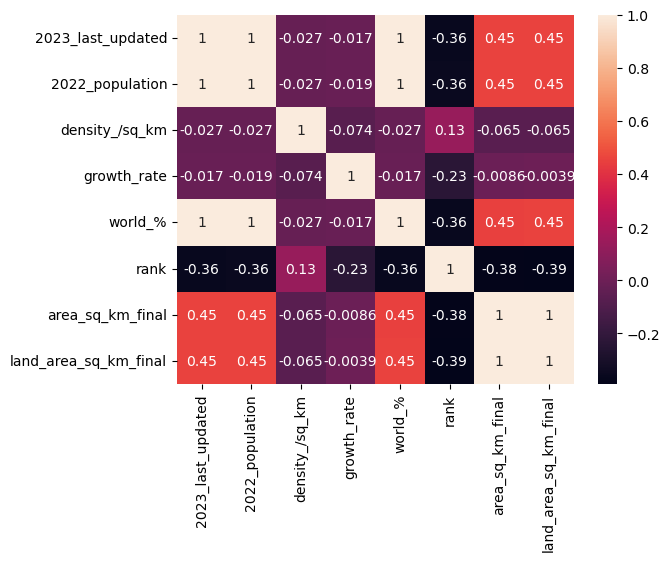

In [209]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [210]:
df.set_index('rank').head(20)

,iso_code,country,2023_last_updated,2022_population,density_/sq_km,growth_rate,world_%,area_sq_km_final,land_area_sq_km_final
rank,,,,,,,,,
1,IND,India,1428465583,1417173173,481.0,0.81,17.85,3300000.0,3000000.0
2,CHN,China,1425675729,1425887337,151.0,-0.02,17.81,9700000.0,9400000.0
3,USA,United States,339974056,338289857,37.0,0.50,4.25,9400000.0,9100000.0
4,IDN,Indonesia,277505959,275501339,148.0,0.74,3.47,1900000.0,1900000.0
5,PAK,Pakistan,240427745,235824862,312.0,1.98,3.00,881900.0,770900.0
6,NGA,Nigeria,223739552,218541212,246.0,2.41,2.80,923800.0,910800.0
7,BRA,Brazil,216407222,215313498,26.0,0.52,2.70,8500000.0,8400000.0
8,BGD,Bangladesh,172932742,171186372,1329.0,1.03,2.16,147600.0,130200.0
9,RUS,Russia,144450480,144713314,9.0,-0.19,1.80,17100000.0,16400000.0


## 3. Outliers 

<Axes: >

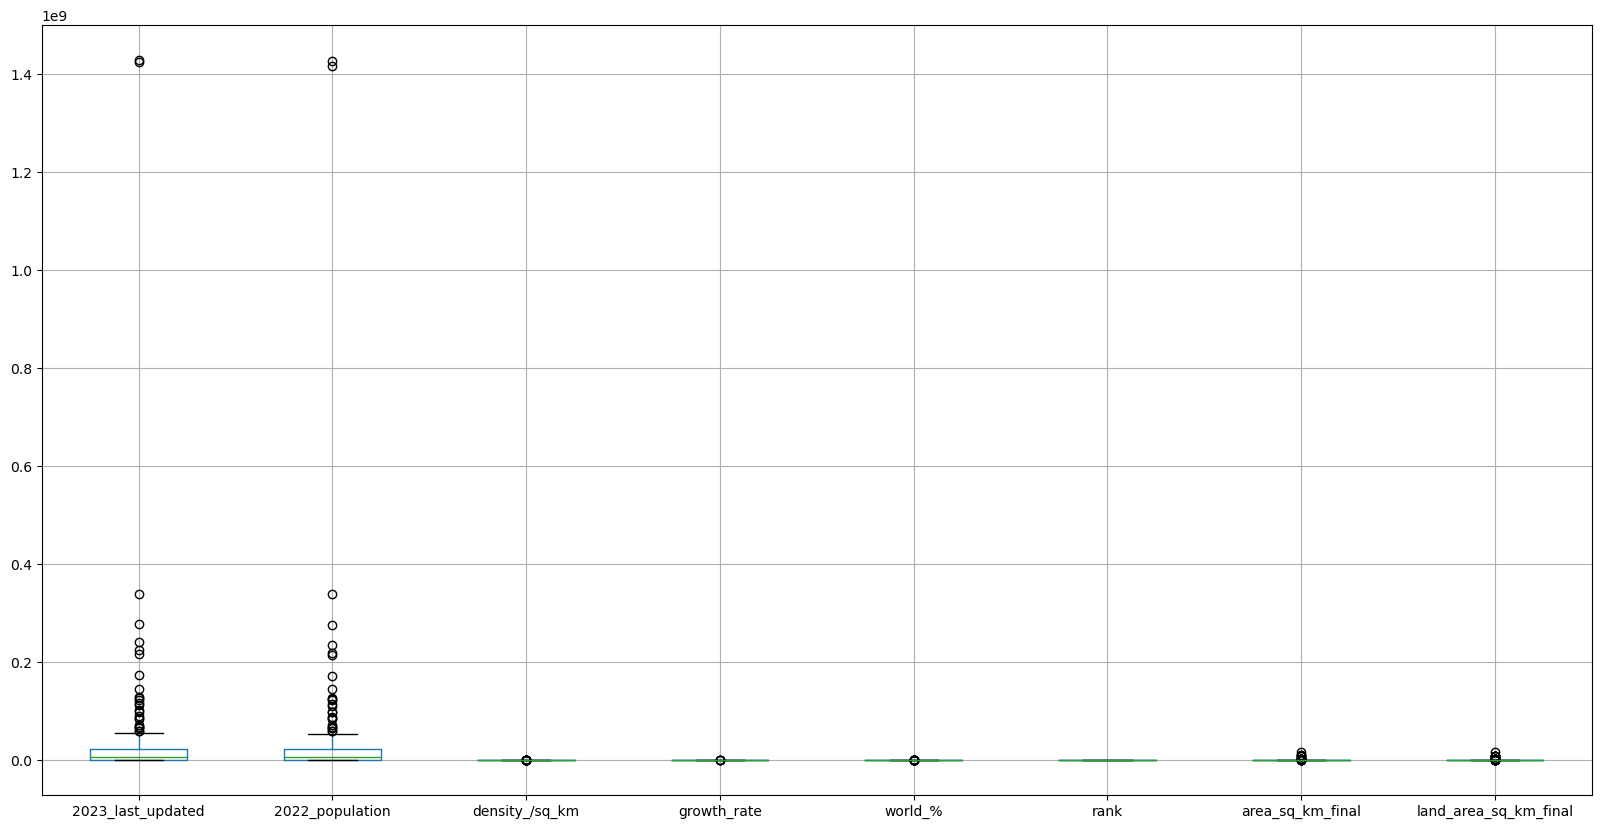

In [212]:
df.boxplot(figsize=(20,10))

In [217]:
# to select the columns which are numbers
df.select_dtypes(include='number')

,2023_last_updated,2022_population,density_/sq_km,growth_rate,world_%,rank,area_sq_km_final,land_area_sq_km_final
0,1428465583,1417173173,481.00,0.81,17.85,1,3300000.0,3000000.0
1,1425675729,1425887337,151.00,-0.02,17.81,2,9700000.0,9400000.0
2,339974056,338289857,37.00,0.50,4.25,3,9400000.0,9100000.0
3,277505959,275501339,148.00,0.74,3.47,4,1900000.0,1900000.0
4,240427745,235824862,312.00,1.98,3.00,5,881900.0,770900.0
...,...,...,...,...,...,...,...,...
223,4386,4390,43.00,-0.09,0.00,230,102.0,102.0
224,3791,3780,0.31,0.29,0.00,231,12200.0,12200.0
225,1935,1934,7.00,0.05,0.00,232,261.0,261.0
226,1893,1871,189.00,1.18,0.00,233,12.0,10.0


In [218]:
df.select_dtypes(include='object')

,iso_code,country
0,IND,India
1,CHN,China
2,USA,United States
3,IDN,Indonesia
4,PAK,Pakistan
...,...,...
223,MSR,Montserrat
224,FLK,Falkland Islands
225,NIU,Niue
226,TKL,Tokelau
